In [1]:
# for graph plotting
import matplotlib.pyplot as plt
import networkx as nx

# for graph form
from networkx.drawing.nx_agraph import graphviz_layout

# my custom class which implements multilayer perceptron
from mypackage.model import MultilayerPerceptron

from typing import Tuple

# for beauriful dictionary printing
import json

import pandas as pd



# function which plots the graph
def plot_graph(graph: nx.DiGraph, 
               figsize: Tuple[int, int] = (10, 10),
               title: str = 'graph') -> None:
    plt.figure(figsize=figsize)
    plt.title(title)
    
    pos = graphviz_layout(graph, prog='dot')
    nx.draw(graph, pos, 
            node_color='white', font_color='black',
            font_size=16,  node_size=3000,
            with_labels=True, 
            arrows=True)    

    ax = plt.gca() # to get the current axis
    ax.collections[0].set_edgecolor('black') 
    plt.show()


def pretty_print(dictionary: dict) -> None:
    to_print = (json.dumps(dictionary, indent=4))[2:-2]
    to_print = to_print.replace('{', '').replace('}', '').replace(',\n', '\n')
    print( to_print )

### model initializing and trainig XOR function

In [24]:
model = MultilayerPerceptron()
model.add_input_layer('x', 2)
model.add_hidden_layer('y', 2, 'relu')
model.add_output_layer('z', 1, 'sigmoid')

X =[ [1, 0],
     [0, 1],
     [1, 1],
     [0, 0], ]
y = [[1], [1], [0], [0]]
epochs = model.fit(X, y, epochs=10000)

In [25]:
model.predict([0, 0])

[0.059497385392838754]

<AxesSubplot:>

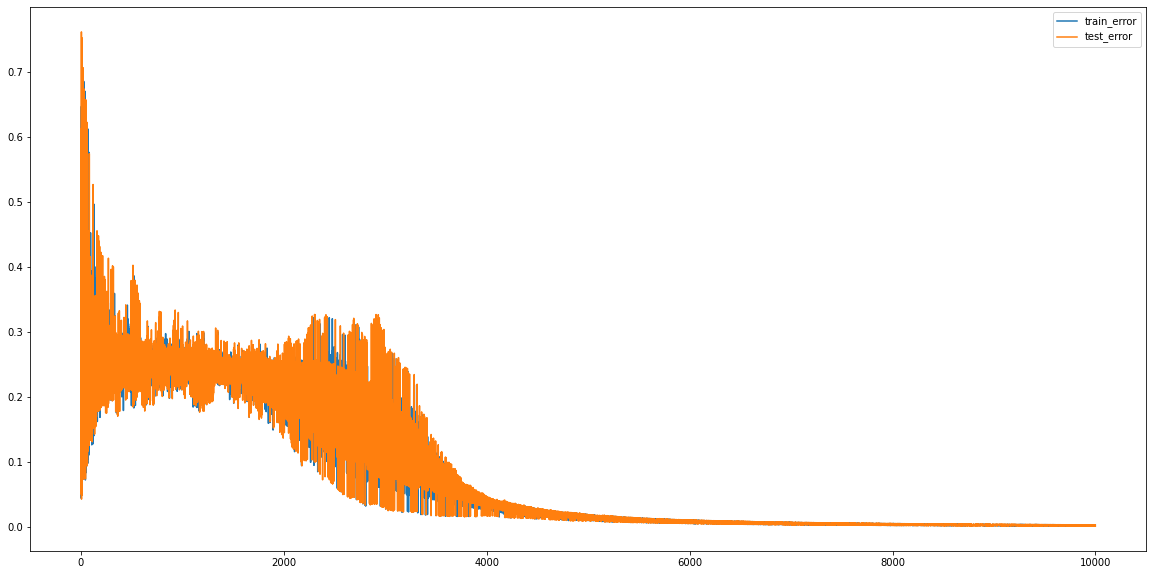

In [26]:
plt.figure(figsize=(20, 10))
pd.DataFrame(epochs).plot(ax=plt.gca())

### with that methods you can plot graphs which shows model structure

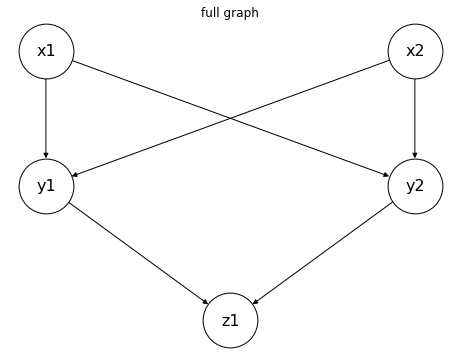

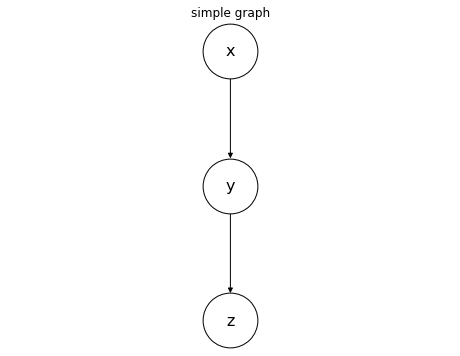

In [32]:
plot_graph( model.get_full_graph(), title='full graph', figsize=(8, 6) )
plot_graph( model.get_simple_graph(), title='simple graph', figsize=(8, 6) )

### you can view model structure like this

In [29]:
pretty_print( model.structure() )

    "x": 
        "x1": 
            "weights": null
            "bias": null
        
        "x2": 
            "weights": null
            "bias": null
        
    
    "y": 
        "y1": 
            "weights": 
                "x1": 2.0270491524817973
                "x2": -2.027284360828555
            
            "bias": 5.826941511363084e-05
        
        "y2": 
            "weights": 
                "x1": -2.041687547763192
                "x2": 2.041480840047462
            
            "bias": -0.00019127487059352458
        
    
    "z": 
        "z1": 
            "weights": 
                "y1": 2.929723182352375
                "y2": 2.8992041683991596
            
            "bias": -1.3804117433297327
        
    
